# 1、Mixup 
将两张图片按照一定的比例融合在一起、两张图像中的标注也合在一起

效果类似如下 ：
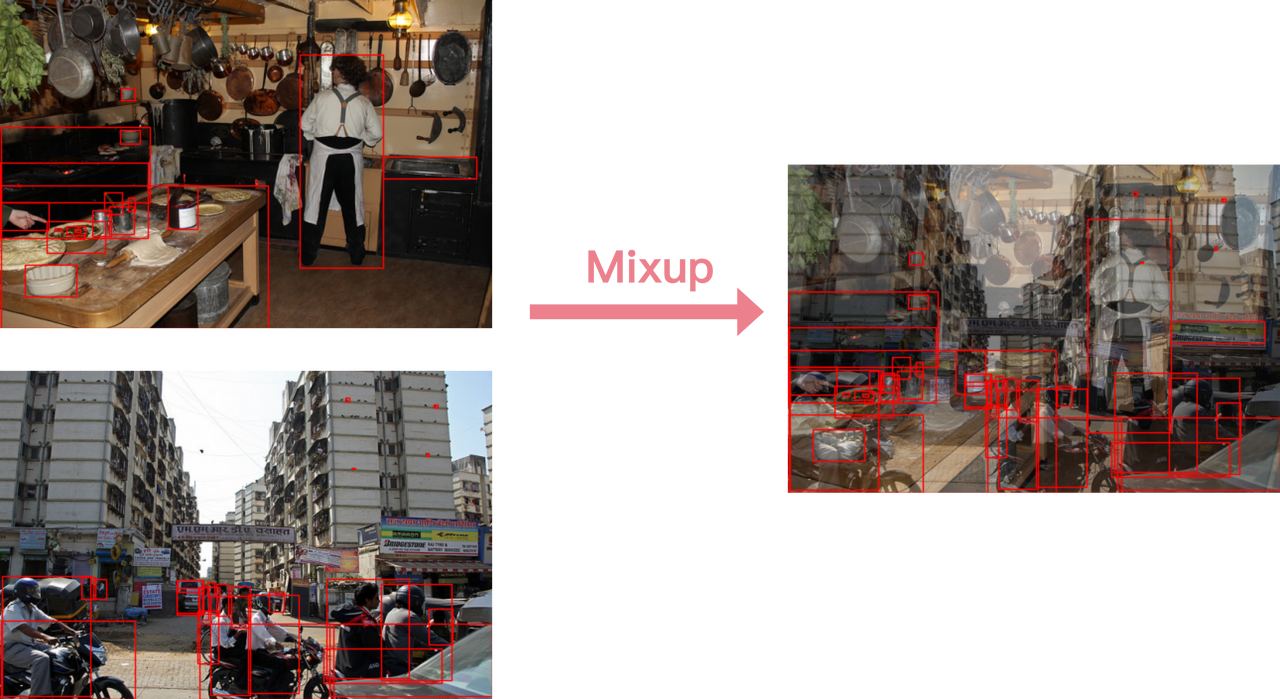

# 2、代码示例

In [ ]:
from PIL import Image
import requests
import numpy as np
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def mixup(im, labels, im2, labels2):
    """
    Applies MixUp augmentation by blending images and labels.
    See https://arxiv.org/pdf/1710.09412.pdf for details.
    """
    # 从 Beta分布中采样一个数值，作为2张图像 mixup 的比例
    r = np.random.beta(32.0, 32.0)  # mixup ratio, alpha=beta=32.0

    # 将 im 和 im2 的像素值按照比例叠加在一起
    im = (im * r + im2 * (1 - r)).astype(np.uint8)
    labels = np.concatenate((labels, labels2), 0)
    return im, labels


if __name__ == '__main__':

    dataDir = '/Users/enzo/Documents/GitHub/prepare/dataset/COCO2017'
    annFile = '{}/annotations/instances_val2017.json'.format(dataDir)

    coco = COCO(annFile)
    image_ids = [296649, 397133]   # 找了2张尺寸一样的图像

    imgs = []
    labels = []

    for img_id in image_ids:
        img_url = coco.imgs[img_id]['coco_url']
        img_1 = Image.open(requests.get(img_url, stream=True).raw)
        imgs.append(np.array(img_1))

        label = [[anno['category_id']]+anno['bbox'] for anno in coco.imgToAnns[img_id]]
        labels.append(np.array(label))

    mixup_img, labels = mixup(imgs[0], labels[0], imgs[1], labels[1])
    plt.imshow(mixup_img)
    plt.axis('off')

    for bbox in labels[:, 1:]:
        rectangle = patches.Rectangle(bbox[:2], bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rectangle)
    plt.show()

# 3、附
## 1）Beta 分布
### （1）np.random.beta()

In [ ]:
np.random.beta(a, b, size=None)

# a 和 b 是 Beta 分布的两个形状参数（shape parameters）。它们必须都大于零。这两个参数决定了 Beta 分布的形状，通常情况下，它们被称为 Alpha 和 Beta 参数。
# size 是要生成的随机样本的数量，可以是一个整数或者一个表示数组形状的元组。
# 如果不提供 size 参数，则返回一个单个随机数
# 如果提供了 size 参数，则返回一个与 size 参数指定形状相同的数组。

### （2）Beta 分布
np.random.beta 用于生成 Beta 分布的随机数

Beta 分布的随机采样点的取值范围在区间 (0, 1) 内的。这是因为 Beta 分布是一个定义在 (0, 1) 区间上的概率分布，其概率密度函数在该区间之外的值为零。Beta 分布的概率密度函数为：
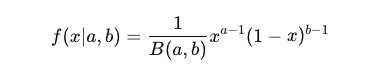

其中：

x是在 (0, 1) 区间内的随机变量

a和 b是 Beta分布的两个形状参数，要求a>0 且 b>0。

当 a=b=1 时，Beta 分布退化为（0，1）均匀分布

当 a=b<1 时，表现为两头的概率大，中间的概率小

当 a=b→1 时，相当于{0，1}二项分布，要么取0，要么取1

当 a=b>1 时，表现为两头概率小，中间概率大，类似正态分布

当 a=b→∞ 时，概率恒等于0.5

B(a,b) 是 Beta 函数，定义为：
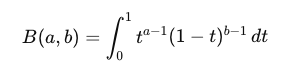

### （3）当 a=32.0， b=32.0 时，Beta 分布如下

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一万个样本
samples = np.random.beta(32.0, 32.0, size=10000)

# 绘制直方图
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# 添加标题和标签
plt.title('Beta Distribution (alpha=32.0, beta=32.0)')
plt.xlabel('Value')
plt.ylabel('Density')

# 显示图形
plt.show()

## 2）astype(np.uint8)

In [ ]:
import numpy as np

a = np.array([12, 279]).astype(np.uint8)
print(a)   # [12 23]

np.uint8  表示的是无符号8位整数类型，其取值范围为 0 到 255（即 2^8 −1），如果处理的数据超过 255，则结果值为 原数据除以 256 取余数（在该数据类型中，溢出时会发生“模运算”）。 比如上面例子中的 279，处理结果值为 279 % 256 = 23